# Sign Language MNIST

* **Reference**: https://www.kaggle.com/datamunge/sign-language-mnist

## Background

* Originally, the MNIST image dataset of handwritten digits is a popular benchmark for image-based machine learning methods but researchers have renewed efforts to update it and develop drop-in replacements that are more challenging for computer vision and original for real-world applications.
* Dataset has excluded J and Z which require motion).
* Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). The training data (27,455 cases) and test data (7172 cases).
* Similar with a header row of label, pixel1,pixel2….pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255. The original hand gesture image data represented multiple users repeating the gesture against different backgrounds. 
* The Sign Language MNIST data came from greatly extending the small number (1704) of the color images included as not cropped around the hand region of interest.



## American Sign Language：


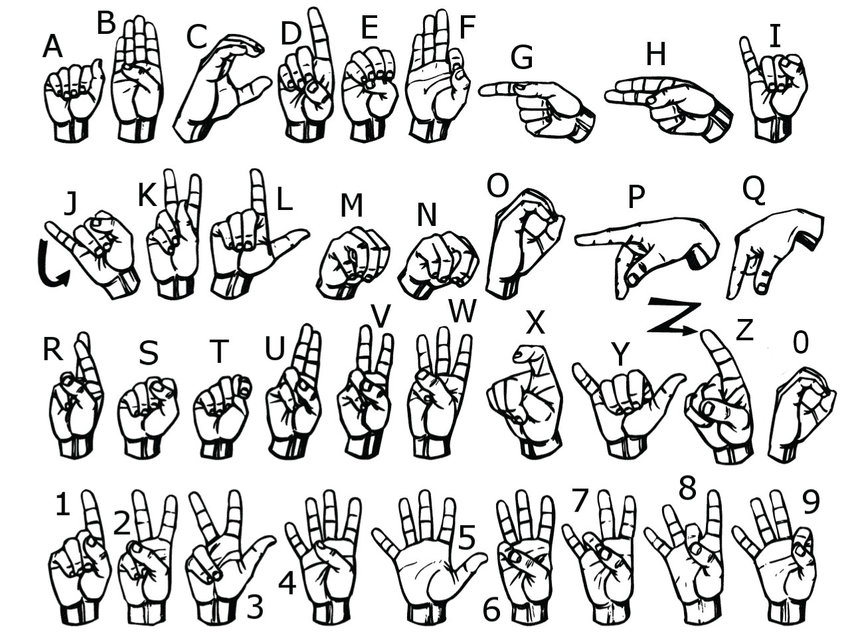

In [1]:
from IPython.display import Image
Image("The-26-letters-and-10-digits-of-American-Sign-Language-ASL.png")

## Aim/Purpose:

* Data exploration of images
    - Summarise number of training/test cases.
* Neural Network building:
    - Data Augmentation:
        - Increase accuracy of **validation sets**
        - Rescaling/Normalize the images.
        - Rotation by angle.
        - Random shifting with range.
        - Shearing.
        - Random zooming.
        - Horizontal/Vertical Flipping.
    - Neural Network:
        - Add two **Convolution Layers** with ReLu activation function.
        - Add three **Pooling Layers** consecutively after convolutionalize the images.
        - Add a single **Flatten Layer** to convert matrix of pixels into array to further parsing.
        - Add a **Dropout** layer to probabilistically remove the inputs to a layer, which may be input variables in the data sample or activations from a previous layer.
        - Add **dense** layer to compile the weights and finally another one to determines the class of object.
])

* Loss function in Compiling:
    - Mainly we use Cross Entropy function as **log-loss function**.
    - For 2 class/binary classification:
        - Binary Crossentropy.
    - For multi class classification:
        - Categorical Crossentropy (for one-hot encoded such as [1,0,0] , [0,1,0], [0,0,1])
        - **Sparse Categorical Crossentropy (for integer in our cases)**
        
* Optimizer in Compiling:
    - **Simple Reference**: https://towardsdatascience.com/understanding-rmsprop-faster-neural-network-learning-62e116fcf29a
    -  **RMSProp**: 
        - RMS stands for root mean square.
        - Keep the moving average of the squared gradients for each weight. 
        - And then we divide the gradient by square root the mean square.
        
## Summary of the result

* Achieved 86.34% and 97.03% accuracy respectively for training and validating, which is a pretty good result.

In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [3]:
def get_data(filename):
    images = []
    labels = []
    with open(filename) as training_file:
        images = []
        labels = []
        #skip first row.
        training_file.readline()
        for count,row in enumerate(training_file):
            row = row.split(",")
            label = np.array(row[0]).astype(np.float)
            image_string = np.array(row[1:785]).astype(np.float)
            
            image = np.array_split(image_string, 28)
            
            label = np.array(label) 
            image = np.array(image) 
            
            labels = np.append(labels, label)
            images.append(image)
                
                
        labels = np.array(labels).astype(float)
        images = np.array(images).astype(float)

    return images, labels


path_sign_mnist_train = f"{getcwd()}\\sign_mnist_train\\sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}\\sign_mnist_test\\sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [4]:
train = pd.read_csv(path_sign_mnist_train)
test = pd.read_csv(path_sign_mnist_test)
labels = train['label'].values
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

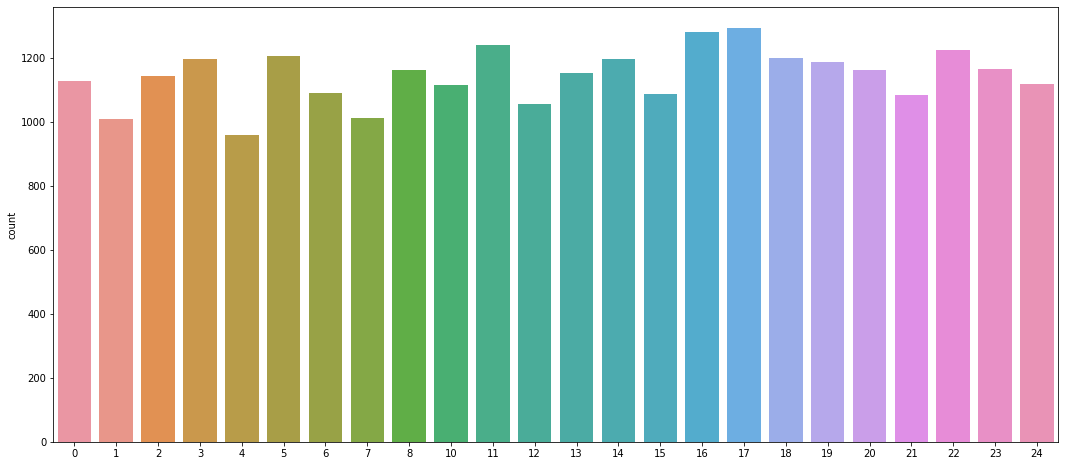

In [5]:
plt.figure(figsize = (18,8))
sns.countplot(x =labels)

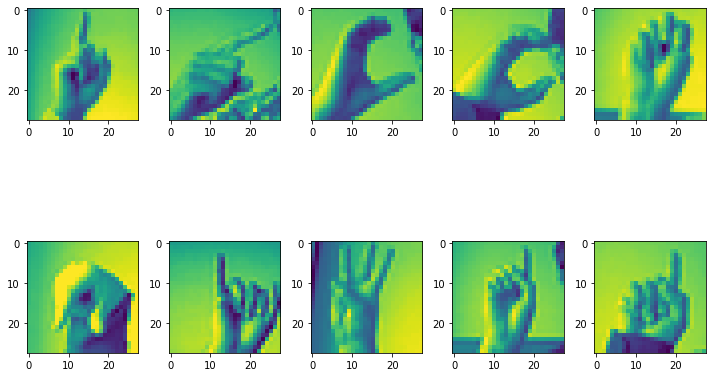

In [6]:
f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(training_images[k].reshape(28, 28))
        k += 1
    plt.tight_layout()  

In [7]:
# Adding another dimension to the data

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255. )
    
# Keep These
print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [11]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dropout(0.2),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(25, activation='softmax')
])



In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)              

In [13]:
# Compile Model. 
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Train the Model
history = model.fit_generator(train_datagen.flow(training_images, training_labels), 
                              validation_data = validation_datagen.flow(testing_images, testing_labels),
                              epochs=20, verbose = 1)

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/20
858/858 [==============================] - 63s 73ms/step - loss: 2.6433 - accuracy: 0.1947 - val_loss: 1.9959 - val_accuracy: 0.3452
Epoch 2/20
858/858 [==============================] - 63s 73ms/step - loss: 1.8620 - accuracy: 0.4072 - val_loss: 1.0466 - val_accuracy: 0.6654
Epoch 3/20
858/858 [==============================] - 63s 74ms/step - loss: 1.4217 - accuracy: 0.5404 - val_loss: 0.8274 - val_accuracy: 0.6997
Epoch 4/20
858/858 [==============================] - 63s 73ms/step - loss: 1.1617 - accuracy: 0.6201 - val_loss: 0.5055 - val_accuracy: 0.8261
Epoch 5/20
858/858 [==============================] - 64s 74ms/step - loss: 0.9829 - accuracy: 0.6750 - val_loss: 0.4770 - val_accuracy: 0.8376
Epoch 6/20
858/858 [==============================] - 63s 73ms/step - loss: 0.8523 - accuracy: 0.7165 - val_loss: 0.3737 - val_accuracy: 0.8684
Epoch 7/20
858/858 [==============================] - 63s 74ms/step - loss: 0.7739 - accuracy: 0.7432 - val_loss: 0.2677 - val_accuracy:

[128.69027710811957, 0.73898494]

# Summary of Model

* 86.34% and 97.03% accuracy achieved for training and validating, which is a pretty good result.
* The probability of overfitting has been reduced by **data augmentation** and further prove by having testing accuracy higher than training accuracy.

# Finally, save the model

* Use **built-in tensorflow** package to save the trained model.
* To re-load the model, simply keras.models.load_model('sign_mnist')

In [17]:
model.save('sign_mnist')

INFO:tensorflow:Assets written to: sign_mnist\assets


In [11]:
from tensorflow import keras
keras.models.load_model('sign_mnist')

# Accuracy and losses across each opoch on training/validation sets


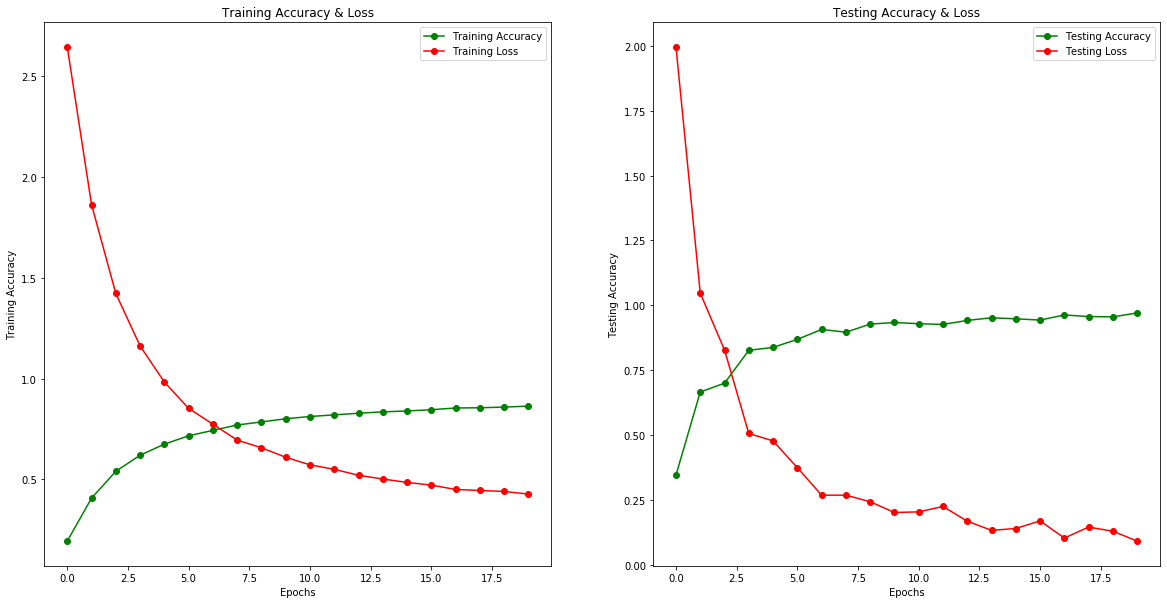

In [15]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(20,10)
ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , train_loss , 'ro-' , label = 'Training Loss')
ax[0].set_title('Training Accuracy & Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Training Accuracy")
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']
ax[1].plot(epochs , test_acc , 'g-o' , label = 'Testing Accuracy')
ax[1].plot(epochs , test_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Testing Accuracy")
plt.show()

In [18]:
predictions = model.predict_classes(testing_images)
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1
predictions[:5]   

array([ 6,  5, 11, 14, 12], dtype=int64)

In [66]:
predictions = model.predict_classes(testing_images)
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1
predictions[:5]   

correct = np.nonzero(predictions == testing_labels)[0]
incorrect = np.nonzero(predictions != testing_labels)[0]

# Sample of Correct and Incorrect Predicition

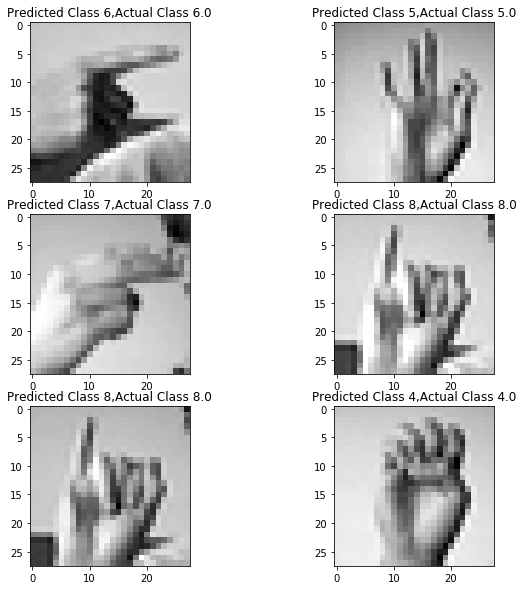

In [47]:
i = 0
plt.subplots(figsize=(10, 10))
for c in correct[:6]:
    plt.subplot(3, 2, i+1)
    plt.imshow(testing_images[c].reshape(28,28), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], testing_labels[c]))
    plt.show
    i += 1

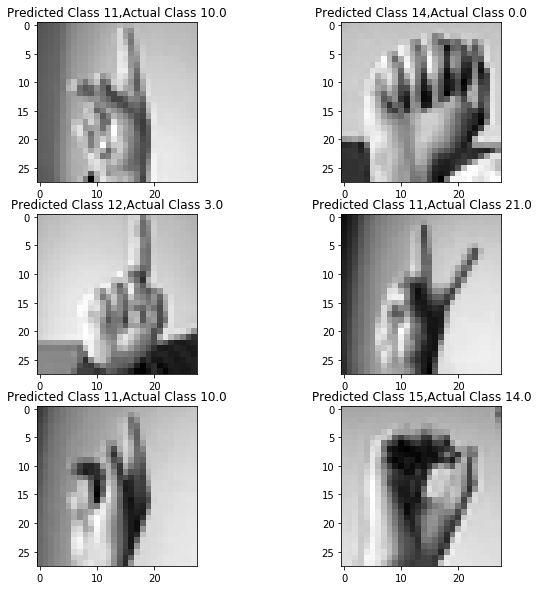

In [49]:
i = 0
plt.subplots(figsize=(10, 10))
for c in incorrect[:6]:
    plt.subplot(3, 2, i+1)
    plt.imshow(testing_images[c].reshape(28,28), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], testing_labels[c]))
    plt.show
    i += 1